<a href="https://colab.research.google.com/github/amie001/AfroTech-Girls-Task-1/blob/main/Final_Assessment_by_Amarachi_Ike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project**

For this final assessment, we would be exploring this data. We would be working with data to predict the risk tag based on a person's information.


##Importing Libraries

**import the usual libraries for pandas and plotting. You can import sklearn later.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Get the Data

**use pandas to read the dataframes**



In [3]:
df = pd.read_csv('/content/Data.csv')

**Check out the data using info(), describe() and others to get a look at your data**

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.shape

(252000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


##Exploratory Data Analysis

Let's do some exploratory data analysis, we'll use seaborn and matplotlib built in plotting capabilities. Feel free to use whatever library you want to use.

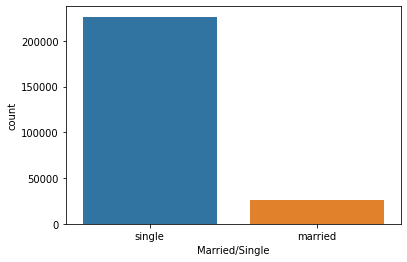

In [ ]:
ax = sns.countplot(x="Married/Single", data=data)


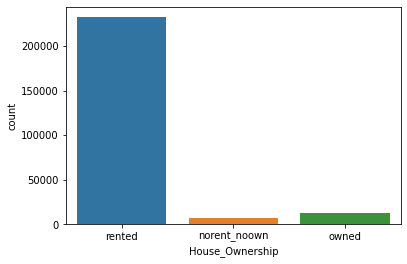

In [ ]:
ax = sns.countplot(x="House_Ownership", data=data)


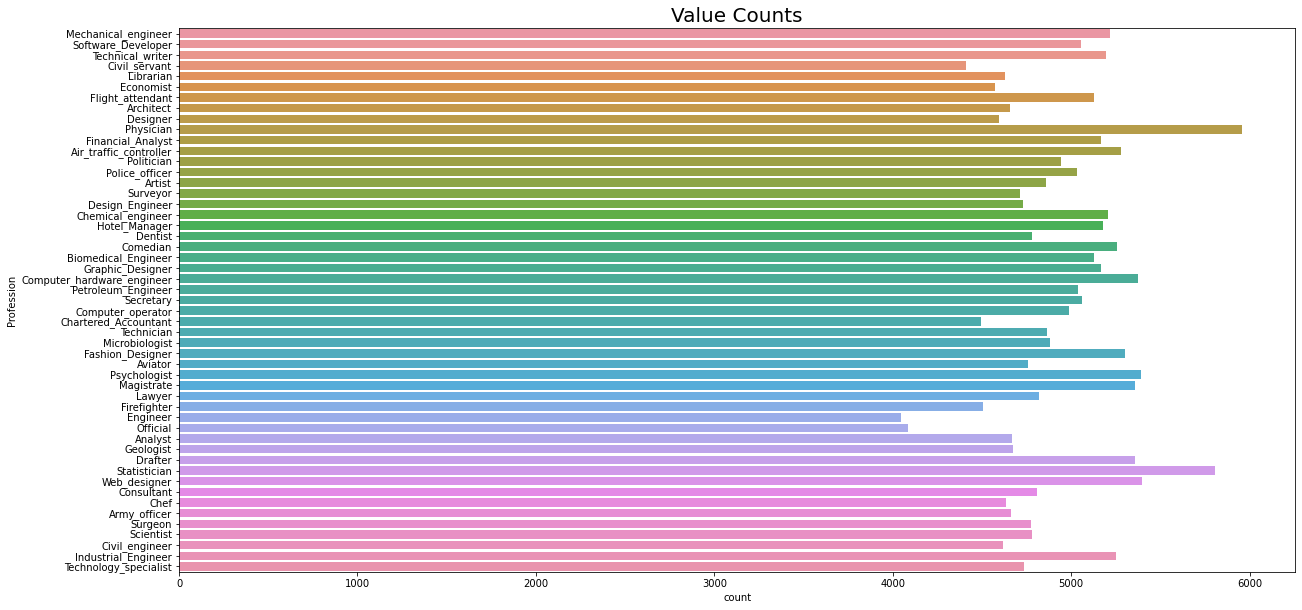

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))  # a figure with a single Axes
sns.countplot(y="Profession", data=data)
ax.set_title('Value Counts', fontsize=20)
plt.show()

In [ ]:
data.STATE.value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [ ]:
df_categories = df.select_dtypes(include=['object'])
df_categories.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [ ]:
#tolistallnumericaldatatypes
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_num.head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,3.0,13.0,0.0
1,2,7574516,40,10,9.0,13.0,0.0
2,3,3991815,66,4,4.0,10.0,0.0
3,4,6256451,41,2,2.0,12.0,1.0
4,5,5768871,47,11,3.0,14.0,1.0


In [ ]:
df.groupby('Married/Single').agg({'Income':['count','mean','max','min']})

Income                              
                 count          mean      max    min
Married/Single                                      
married          25728  4.974221e+06  9994061  11550
single          226272  4.999720e+06  9999938  10310

In [ ]:
df.groupby(['Experience']).Income.agg(['mean', min, max]).sort_values(by='mean',ascending=False)

,mean,min,max
Experience,,,
12,5.282886e+06,12902,9993649
13,5.176109e+06,13220,9998070
17,5.150731e+06,21995,9995445
9,5.142933e+06,16212,9996861
15,5.090523e+06,29519,9973420
2,5.070527e+06,13357,9979070
19,5.056668e+06,11114,9999938
4,5.039216e+06,12841,9994882
3,5.027427e+06,13792,9992141


In [ ]:
Clue = df.groupby(['Profession']).Income.agg(['mean', max, min]).sort_values(by='mean',ascending=False)
Clue

,mean,max,min
Profession,,,
Petroleum_Engineer,5.443310e+06,9968353,22921
Psychologist,5.357795e+06,9985964,33224
Designer,5.336802e+06,9996946,12841
Scientist,5.282710e+06,9975985,13792
Surgeon,5.235359e+06,9995445,18215
Comedian,5.199539e+06,9984983,13429
Chemical_engineer,5.189805e+06,9984718,26926
Mechanical_engineer,5.175032e+06,9990505,37057
Artist,5.164765e+06,9976619,31297


In [13]:
Clue_2 = df.groupby(['STATE']).Income.agg(['mean', max, min]).sort_values(by='mean',ascending=False)
Clue_2

,mean,max,min
STATE,,,
Manipur,6.201936e+06,9605093,373596
Rajasthan,5.237206e+06,9978110,41719
Mizoram,5.159259e+06,8915716,340023
Kerala,5.147840e+06,9985964,210054
West_Bengal,5.145355e+06,9959440,10310
Andhra_Pradesh,5.132634e+06,9998070,11114
Jharkhand,5.131951e+06,9889836,28561
Bihar,5.090864e+06,9981206,61219
Tripura,5.077603e+06,9937676,612456


In [15]:
Due_2 = Clue_2.index.values
Due_2

array(['Manipur', 'Rajasthan', 'Mizoram', 'Kerala', 'West_Bengal',
       'Andhra_Pradesh', 'Jharkhand', 'Bihar', 'Tripura', 'Chhattisgarh',
       'Gujarat', 'Maharashtra', 'Karnataka', 'Delhi', 'Tamil_Nadu',
       'Telangana', 'Odisha', 'Punjab', 'Madhya_Pradesh', 'Haryana',
       'Uttar_Pradesh', 'Assam', 'Sikkim', 'Uttarakhand',
       'Jammu_and_Kashmir', 'Uttar_Pradesh[5]', 'Puducherry',
       'Himachal_Pradesh', 'Chandigarh'], dtype=object)

In [ ]:
Due = Clue.index.values
Due

array(['Petroleum_Engineer', 'Psychologist', 'Designer', 'Scientist',
       'Surgeon', 'Comedian', 'Chemical_engineer', 'Mechanical_engineer',
       'Artist', 'Financial_Analyst', 'Consultant', 'Lawyer',
       'Computer_operator', 'Surveyor', 'Secretary', 'Army_officer',
       'Aviator', 'Fashion_Designer', 'Industrial_Engineer',
       'Firefighter', 'Microbiologist', 'Statistician', 'Librarian',
       'Architect', 'Chartered_Accountant', 'Hotel_Manager',
       'Computer_hardware_engineer', 'Technology_specialist',
       'Biomedical_Engineer', 'Technician', 'Air_traffic_controller',
       'Dentist', 'Civil_servant', 'Technical_writer', 'Economist',
       'Politician', 'Graphic_Designer', 'Analyst', 'Web_designer',
       'Software_Developer', 'Geologist', 'Design_Engineer', 'Chef',
       'Engineer', 'Physician', 'Magistrate', 'Civil_engineer',
       'Official', 'Drafter', 'Flight_attendant', 'Police_officer'],
      dtype=object)

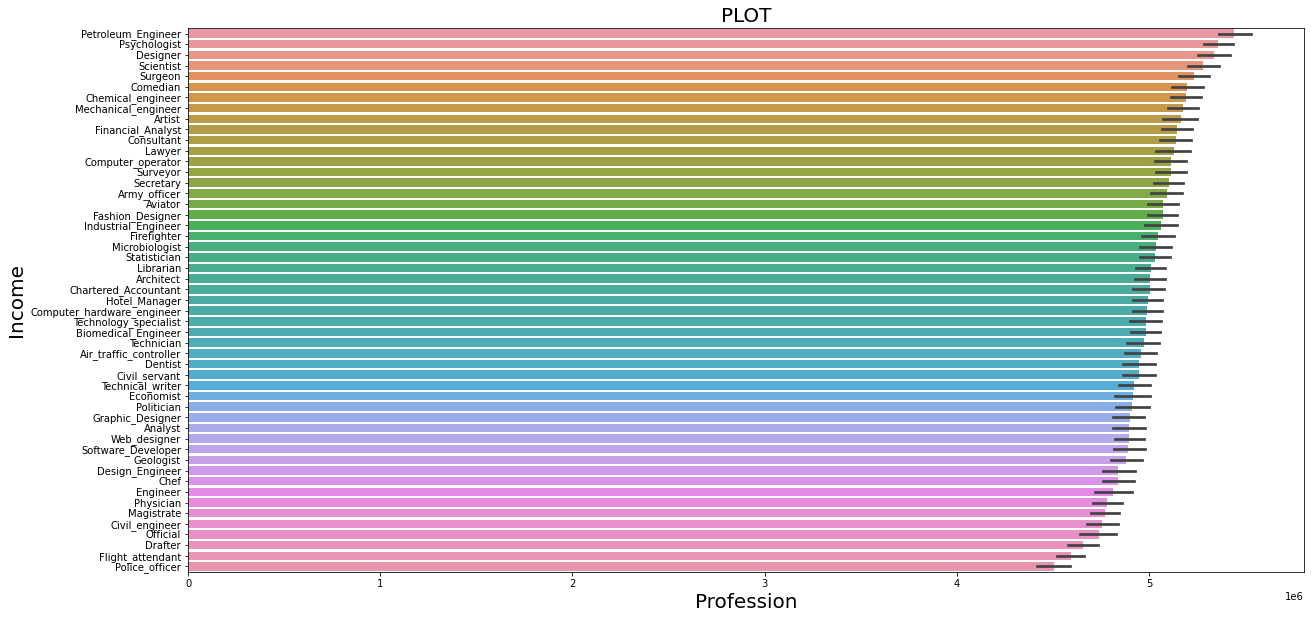

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))  # a figure with a single Axes
sns.barplot(x='Income', y='Profession', data=data, order=Due)
ax.set_title('PLOT', fontsize=20)
ax.set_xlabel('Profession', fontsize=20)
ax.set_ylabel('Income', fontsize=20)
plt.show()

In [ ]:
'''Make more plots from your inituition using any plotting library,
 it can be univariant (single variable/column) or multivariant (multiple variables/columns)'''

In [ ]:
df[['Income']].dtypes

Income    int64
dtype: object

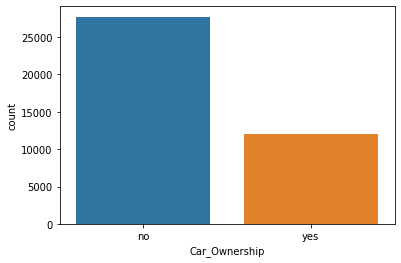

In [7]:
ax = sns.countplot(x="Car_Ownership", data=df)

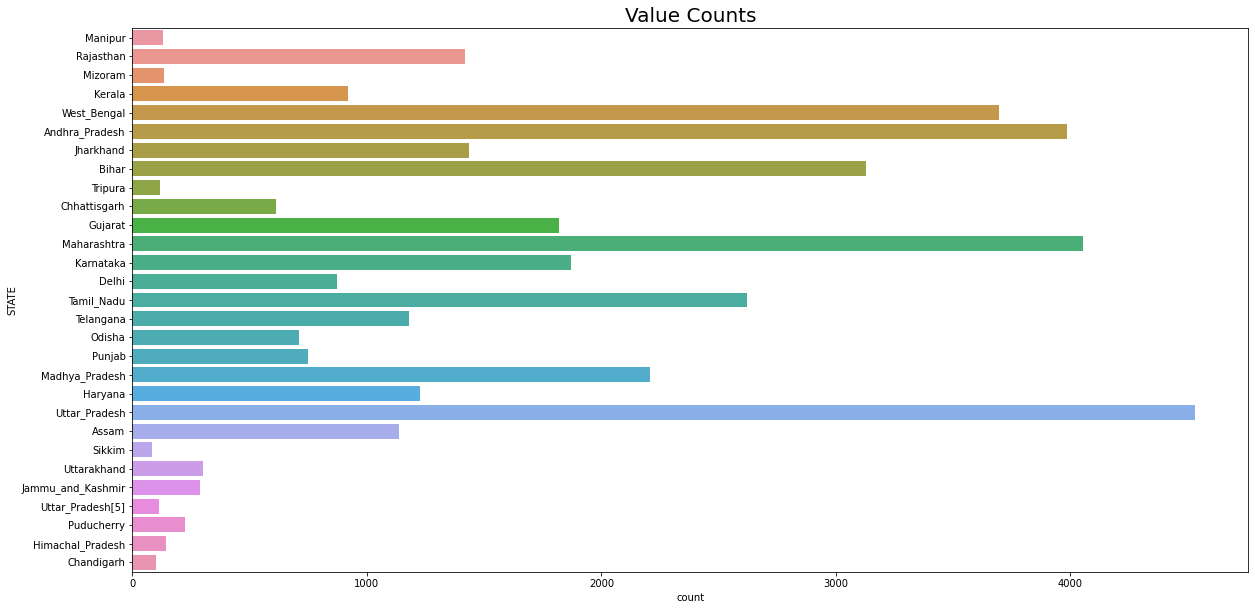

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))  # a figure with a single Axes
sns.countplot(y="STATE", data=df, order=Due_2)
ax.set_title('Value Counts', fontsize=20)
plt.show()

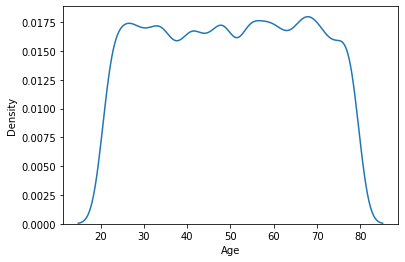

In [26]:
sns.kdeplot(df.query('Age < 80').Age)

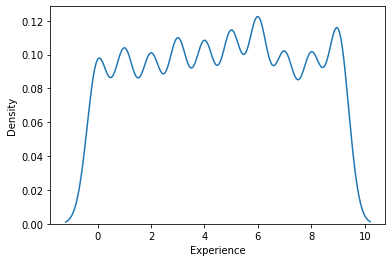

In [27]:
sns.kdeplot(df.query('Experience < 10').Experience)

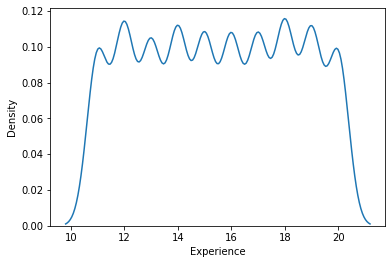

In [31]:
sns.kdeplot(df.query('Experience > 10').Experience)

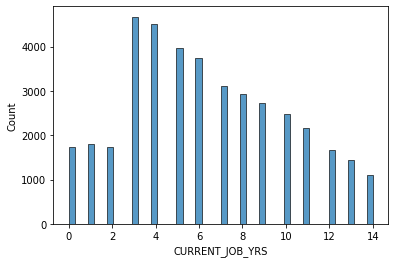

In [41]:
sns.histplot(df['CURRENT_JOB_YRS'])

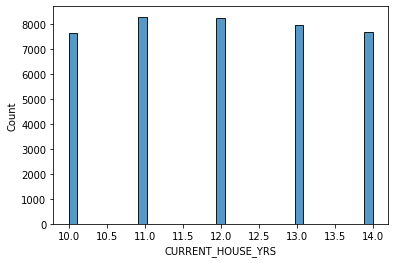

In [52]:
sns.histplot(df['CURRENT_HOUSE_YRS'])

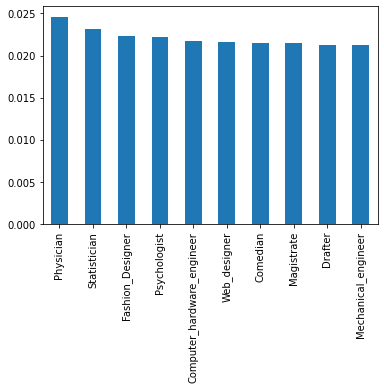

In [45]:
(df['Profession'].value_counts().head(10) / len(df)).plot.bar()

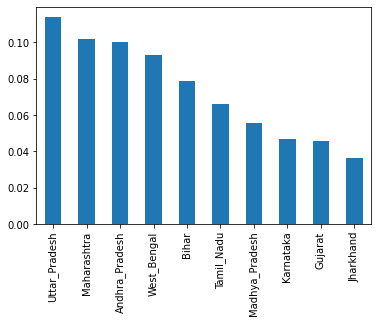

In [47]:
(df['STATE'].value_counts().head(10) / len(df)).plot.bar()

##Preprocessing

In [53]:
#make a copy of the DataFrame to leave the main data unaffected
df_copy = df.copy()

In [54]:
df2 = df.drop(["Id", "CITY"], axis=1)
df2.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3.0,13.0,0.0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9.0,13.0,0.0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4.0,10.0,0.0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2.0,12.0,1.0
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3.0,14.0,1.0


In [69]:
#Import LabelEncoder from the sklearn library
from sklearn.preprocessing import LabelEncoder

In [56]:
Mar_LE = LabelEncoder()
Hou_LE = LabelEncoder()
Car_LE = LabelEncoder()
Pro_LE = LabelEncoder()
Sta_LE = LabelEncoder()


In [72]:
df['Married/Single']=Mar_LE.fit_transform(df['Married/Single'])
df['House_Ownership']=Hou_LE.fit_transform(df['House_Ownership'])
df['Car_Ownership']=Car_LE.fit_transform(df['Car_Ownership'])
df['Profession']=Pro_LE.fit_transform(df['Profession'])

df2 = df.drop(["Id", "CITY", "STATE"], axis=1)
df2.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,34,3.0,13.0,0.0
1,7574516,40,10,1,2,0,44,9.0,13.0,0.0
2,3991815,66,4,0,2,0,48,4.0,10.0,0.0
3,6256451,41,2,1,2,1,44,2.0,12.0,1.0
4,5768871,47,11,1,2,0,11,3.0,14.0,1.0


In [59]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop('Risk_Flag',axis=1)
y = df['Risk_Flag']

In [85]:
X

,Id,Income,Age,Experience,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,2,0,34,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,2,0,44,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,2,0,48,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,2,1,44,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,2,0,11,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39803,39804,3246861,79,2,2,1,5,Adoni,Andhra_Pradesh,2.0,13.0,0.0
39804,39805,1478769,22,14,2,0,43,Shimla,Himachal_Pradesh,8.0,12.0,0.0
39805,39806,9541394,22,15,2,1,42,Rewa,Madhya_Pradesh,12.0,11.0,0.0
39806,39807,704775,33,8,2,0,3,Saharanpur,Uttar_Pradesh,4.0,14.0,0.0


In [95]:
y

0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
39803    0.0
39804    0.0
39805    0.0
39806    0.0
39807    NaN
Name: Risk_Flag, Length: 39808, dtype: float64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees

We'll start just by training a single decision tree.

In [76]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [80]:
from sklearn.model_selection import train_test_split

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [86]:
dtree=DecisionTreeClassifier()

In [65]:
from sklearn import metrics

In [99]:
dtree.fit(X_train,y_train)

ValueError: ignored

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [90]:
predictions = dtree.predict(X_test)

NotFittedError: ignored

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     66361
           1       0.51      0.57      0.54      9239

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600



[[61298  5063]
 [ 3952  5287]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [93]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS',
 'Risk_Flag']

In [94]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

NotFittedError: ignored

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.



**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66361
           1       0.59      0.54      0.57      9239

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



**Show the Confusion Matrix for the predictions.**

[[62919  3442]
 [ 4208  5031]]


**What performed better the random forest or the decision tree?**

# Great Job!